In [1]:
# Base imports
import time
import datetime
import pytz
# IO Imports
import os
import json
# Datawork Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# Plotting imports
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
def retrieve_data(data_path = "../data1/", start_idx=0, stop_idx=60):
    # list to store files
    f_store = []
    results = {}
    columns = []
    
    # Iterate directory
    for file_name in os.listdir(data_path):
        # check if current file_path is a file
        if os.path.isfile(os.path.join(data_path, file_name)):
            # add filename to list
            f_store.append(file_name)

    flag = True
    for file_name in f_store:
        data = {}
        tmp_dt = ''
        # Open the JSON file
        with open(data_path + file_name) as file:
            data = json.load(file)
        for i in range(start_idx, stop_idx+1):
            try:
                if data:
                    if i == start_idx:
                        tmp_dt = data[str(i)]['timestamp']
                    
                    if file_name == f_store[0]:
                        columns.append(data[str(i)]['name'])
                    if flag:
                        if i == start_idx:
                            results['timestamp'] = [tmp_dt]
                        results[columns[i]] = [data[str(i)]['value']]
                    else:
                        if i == start_idx:
                            results['timestamp'].append(tmp_dt)
                        results[columns[i]].append(data[str(i)]['value'])
            except KeyError:
                print(file_name)
                print(i)
                pass
        flag = False
    #print(results)
    return results

In [35]:
def dynamic_plot(df_array, fields, names, units, ranges):

    # Calc array bounds
    num_fields = len(fields)
    num_arrays = len(df_array)
    
    # Set up plots
    fig, axes = plt.subplots(num_fields*num_arrays, 1, figsize=(15, 5 * num_fields*num_arrays))
    
    # Create timezone for x-axis formatting
    est = pytz.timezone('US/Eastern')
    myFmt = mdates.DateFormatter('%H:%M', tz=est)
    
    fig.subplots_adjust(hspace=0.5)  # Adjust space between subplots

    plot_idx=0
    
    for f_idx in range(len(fields)):
        
        df_idx=0
        
        for df in df_array:

            df_tmp = df[ranges[df_idx][0]:ranges[df_idx][1]]
            
            temp = df_tmp[[fields[f_idx]]]
            axes[plot_idx].plot(df_tmp['timestamp'], temp, label=names[f_idx])

            # Set x-axis formatter and labels
            axes[plot_idx].xaxis.set_major_formatter(myFmt)
            axes[plot_idx].set_xlabel('Time (HH:MM)')
            axes[plot_idx].set_ylabel(f'{names[f_idx]} ({units[f_idx]})')  # Use unit from the units list
            axes[plot_idx].set_title(f'{names[f_idx]} Over Time')
            #fig.autofmt_xdate()  # Rotate date labels for better readability

            plot_idx = plot_idx+1
            df_idx=df_idx+1


    # Add a legend to each subplot
    for ax in axes:
        ax.legend()

    plt.show()

In [16]:
# dataset 1
res1=retrieve_data(data_path = "../data1/")
df1 = pd.DataFrame.from_dict(res1)
df1['timestamp']= pd.to_datetime(df1['timestamp'],  format='%d.%m.%Y %H:%M:%S,%f')

In [17]:
# dataset 2
res2=retrieve_data(data_path = "../data2/")
df2 = pd.DataFrame.from_dict(res2)
df2['timestamp']= pd.to_datetime(df2['timestamp'],  format='%d.%m.%Y %H:%M:%S,%f')

In [18]:
# dataset 3
res3=retrieve_data(data_path = "../data3/")
df3 = pd.DataFrame.from_dict(res3)
df3['timestamp']= pd.to_datetime(df3['timestamp'],  format='%d.%m.%Y %H:%M:%S,%f')

In [19]:
fields = [
    'GECO/MP_Pump_Pressure_Current_bar_R',
    'GECO/MPTX_DI_Water_Temperature_C_R',
    'GECO/MPXMB_Pump_OutputCurrent_dA_I',
    'GECO/MPXMB_Pump_OutputPower_W_I',
    'GECO/MPTX_DI_Mortar_Temperature_C_R',
#    'GECO/MPTX_DI_Air_Temperature_C_R' 
]

names = [
    'Pump Pressure',
    'Water Temp',
    'Pump Current',
    'Pump Power',
    'Mortar Tempurature',
#    'Ambient Temp'
]

units = [
    'BAR',
    'C',
    'dA',
    'W',
    'C'
#    'C'
]

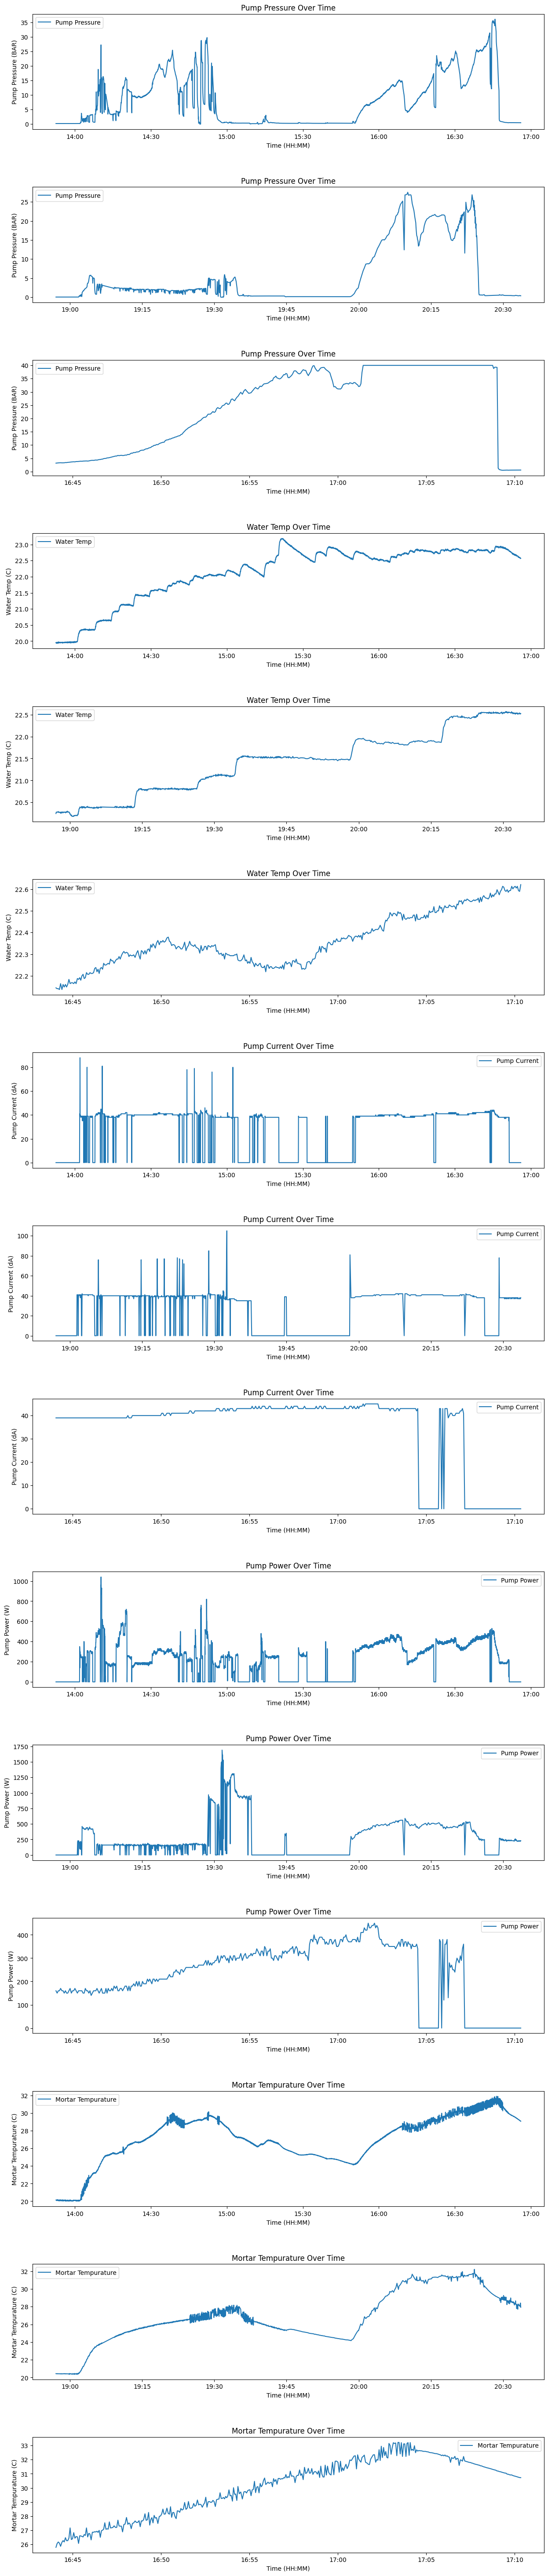

In [49]:
ranges= [[800, 4800], [700, 1800], [100, 500]]
dynamic_plot([df1, df2, df3], fields, names, units, ranges)